In [111]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse

##### Loading data.

In [112]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv('Houseprice_data_scaled.csv') 

In [113]:
# print summary statistics for train data
print("\nSummary statistics\n", data.describe())
print("\nCorrelation matrix\n", data.corr())


Summary statistics
            LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  2908.000000  2908.000000  2908.000000  2908.000000   2908.000000   
mean     -0.014297    -0.011672    -0.001960    -0.020343     -0.032348   
std       0.864624     1.012869     1.000959     1.011374      1.011740   
min      -0.992707    -3.698901    -4.115272    -3.337719     -1.691761   
25%      -0.308670    -0.797802    -0.512407    -0.598187     -0.965106   
50%      -0.089254    -0.072527    -0.512407     0.036583      0.391317   
75%       0.141143     0.652747     0.388309     0.972033      0.924198   
max      22.739771     2.828571     3.090457     1.272713      1.214860   

        BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  2908.000000  2908.000000  2908.000000  2908.000000  2908.000000  ...   
mean     -0.016787    -0.010657    -0.024176    -0.009944    -0.007302  ...   
std       0.996796     0.991912     1.006134     1.003188     0.99

In [114]:
# Export the correlation matrix to csv
data.corr().to_csv('correlationmatrix.csv')

In [115]:
# First 1800 data items are training set; the next 600 are the validation set; the rest are the test set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]
test=data.iloc[2400:2908]

In [116]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val,X_test = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1), test.drop('Sale Price', axis=1)
y_train, y_val,y_test = train[['Sale Price']], val[['Sale Price']], test[['Sale Price']]

###### Ridge Regression

In [117]:
# Import Ridge
from sklearn.linear_model import Ridge
# The alpha used by Python's ridge should be the lambda times the number of observations
# Here we produce results for alpha=180 which corresponds to lambda=0.1
ridge = Ridge(alpha=180)
ridge.fit(X_train, y_train)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(ridge.intercept_) + list(ridge.coef_[0])
    ]
).transpose().set_index(0)


ridgereg_coefficient = pd.DataFrame()
ridgereg_coefficient["Features"] = X_train.columns
ridgereg_coefficient['Coef Estimate'] = pd.Series(ridge.coef_[0])
ridgereg_coefficient

,Features,Coef Estimate
0,LotArea,0.070909
1,OverallQual,0.194576
2,OverallCond,0.075505
3,YearBuilt,0.104159
4,YearRemodAdd,0.045535
5,BsmtFinSF1,0.103386
6,BsmtUnfSF,-0.015928
7,TotalBsmtSF,0.110862
8,1stFlrSF,0.122224
9,2ndFlrSF,0.079162


In [118]:
ridgereg_coefficient.to_csv('ridgereg_coefficient.csv')

###### Ridge with different levels of alpha and its mse


In [165]:
# Importing Ridge
from sklearn.linear_model import Ridge

# The alpha used by Python's ridge should be the lambda times the number of observations
alphas=[0.001*1800,0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
#alphas = np.linspace(0, 3.0, num=20)*1800 # from 0 to 3 with 20 numbers inside
#alphas = range(0,2*1800)
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.11702368844694085
0.11703284346091346
0.11710797319753001
0.11723952924901127
0.11741457158889515
0.11762384068711462
0.11825709631198018
0.11900057469147929
0.12254649996292954
0.1307359968074713


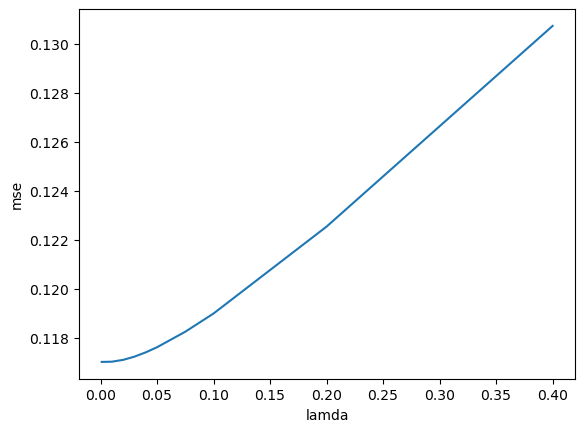

In [166]:
plt.xlabel('lamda')
plt.ylabel('mse')
lamdas = [i/1800 for i in alphas]
plt.plot(lamdas, mses)

###### Selecting alpha based on generalized cross-validation (an efficient form of LOOCV)


In [64]:
##Use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV(). By default, the function performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the argument cv.
##Selecting lambda
##Fit Ridge regression through cross validation

from sklearn.linear_model import RidgeCV
regr_cv=RidgeCV(alphas=range(1,2*1800))
model_cv1=regr_cv.fit(X_train,y_train)
model_cv1.alpha_

48

In [65]:
# MSE at the validation dataset
ridge=Ridge(alpha=model_cv1.alpha_)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_val)
print(mse(y_val,pred))

0.1171902918246371


In [66]:
# MSE at the test dataset
ridge=Ridge(alpha=model_cv1.alpha_)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_test)
print(mse(y_test,pred))

0.11858614271610694


###### Selecting alpha based on k - fold  cross-validation


In [74]:
##Instead of arbitrarily choosing alpha  =4
## , it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV(). By default, the function performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the argument cv.
##Selecting lambda
##Fit Ridge regression through cross validation

from sklearn.linear_model import RidgeCV
regr_cv= RidgeCV(alphas=alphas, fit_intercept=True, cv=10)
model_cv2=regr_cv.fit(X_train,y_train)
model_cv2.alpha_

135.0

In [93]:
# MSE at the validation dataset
ridge=Ridge(alpha=model_cv2.alpha_)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_val)
print(mse(y_val,pred))

0.11825709631198018


In [94]:
# MSE at the test dataset
ridge=Ridge(alpha=model_cv2.alpha_)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_test)
print(mse(y_test,pred))

0.12017808465302704


In [95]:
# Ridge
# import model
from sklearn.linear_model import Ridge
# Here we produce results for alpha=135 which corresponds to lambda=135/1800=0.075
ridge=Ridge(alpha=model_cv2.alpha_)
ridge.fit(X_train, y_train)

# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(ridge.intercept_) + list(ridge.coef_[0])
    ]
).transpose().set_index(0)
ridgereg_coefficient = pd.DataFrame()
ridgereg_coefficient["Features"] = X_train.columns
ridgereg_coefficient['Coef Estimate'] = pd.Series(ridge.coef_[0])
ridgereg_coefficient

,Features,Coef Estimate
0,LotArea,0.072569
1,OverallQual,0.199172
2,OverallCond,0.079425
3,YearBuilt,0.112245
4,YearRemodAdd,0.042126
5,BsmtFinSF1,0.103186
6,BsmtUnfSF,-0.017619
7,TotalBsmtSF,0.113764
8,1stFlrSF,0.124501
9,2ndFlrSF,0.084040


In [96]:
ridgereg_coefficient.to_csv('ridgereg_coefficient_kfold.csv')

In [167]:
print('R squared training set', round(ridge.score(X_train, y_train)*100, 2))
print('R squared test set', round(ridge.score(X_test, y_test)*100, 2))

R squared training set 87.38
R squared test set 86.35
